# Лабораторная работа 2

   по теме
                 
   **Бинарная классификация отраженных сигналов радара**

   Выполнил студент

   Группы БСТ1801

   Харатишвили Заза


Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.6043 - val_loss: 0.7010 - val_accuracy: 0.0952
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.7219 - val_loss: 0.7102 - val_accuracy: 0.1429
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6898 - val_loss: 0.6979 - val_accuracy: 0.4286
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.7219 - val_loss: 0.7245 - val_accuracy: 0.2381
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.7166 - val_loss: 0.6946 - val_accuracy: 0.4286
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7380 - val_loss: 0.6939 - val_accuracy: 0.4286
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6065 - accuracy: 0.7219 - val_loss: 0.7662 - val_accuracy: 0.2857
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8610 - val_loss: 0.4230 - val_accuracy: 0.7619
Epoch 60/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8396 - val_loss: 0.4508 - val_accuracy: 0.7619
Epoch 61/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8503 - val_loss: 0.4425 - val_accuracy: 0.7619
Epoch 62/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8503 - val_loss: 0.4521 - val_accuracy: 0.7619
Epoch 63/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8449 - val_loss: 0.4592 - val_accuracy: 0.7143
Epoch 64/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8503 - val_loss: 0.4827 - val_accuracy: 0.7143
Epoch 65/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8717 - val_loss: 0.4277 - val_accuracy: 0.8095
Epoch 

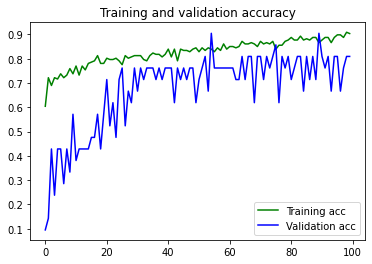

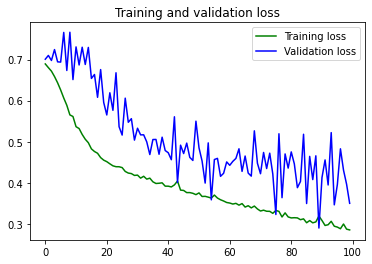

In [26]:
## Импорт бибилиотек для работы с данными
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Делим столбцы на 60 входных параметров (X) и 1 выходной (Y)
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

## Переводим строки в целочисленные значения 0 и 1
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Задаем базовую архитектуру сети
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Функция потерь для оценки качества работы
# binary crossentropy - для задач бинарной классификации
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Обучение сети
out1 = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

# Построение графиков
plt.plot(out1.history['accuracy'], 'g', label='Training acc')
plt.plot(out1.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(out1.history['loss'], 'g', label='Training loss')
plt.plot(out1.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Уменьшим размер входного слоя в два раза и сравним результаты с первоначальной архитектурой

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.4813 - val_loss: 0.6737 - val_accuracy: 1.0000
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5722 - val_loss: 0.6861 - val_accuracy: 0.8095
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6684 - val_loss: 0.6819 - val_accuracy: 0.8571
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.7059 - val_loss: 0.7106 - val_accuracy: 0.1905
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6845 - val_loss: 0.7036 - val_accuracy: 0.3810
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.7433 - val_loss: 0.7183 - val_accuracy: 0.2857
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.7166 - val_loss: 0.6810 - val_accuracy: 0.4762
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8289 - val_loss: 0.5332 - val_accuracy: 0.7143
Epoch 60/100
19/19 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8342 - val_loss: 0.4957 - val_accuracy: 0.7619
Epoch 61/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8182 - val_loss: 0.5174 - val_accuracy: 0.7143
Epoch 62/100
19/19 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8075 - val_loss: 0.5474 - val_accuracy: 0.6190
Epoch 63/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8289 - val_loss: 0.4698 - val_accuracy: 0.7619
Epoch 64/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8182 - val_loss: 0.4924 - val_accuracy: 0.7143
Epoch 65/100
19/19 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8342 - val_loss: 0.4862 - val_accuracy: 0.7619
Epoch 

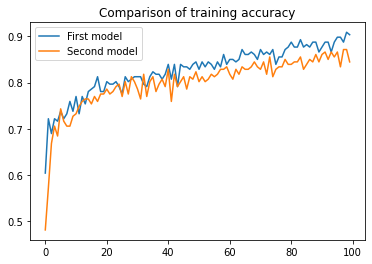

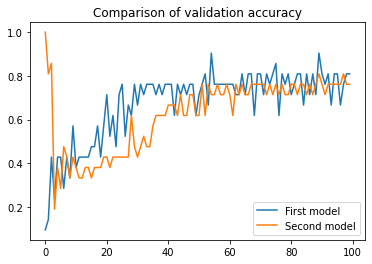

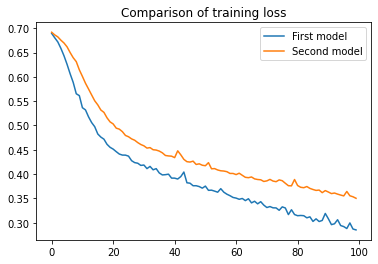

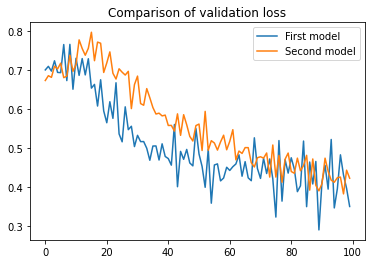

In [27]:
## Делим столбцы на 60 входных параметров (X) и 1 выходной (Y)
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

## Переводим строки в целочисленные значения 0 и 1
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Задаем архитектуру сети с уменьшенным размером входного слоя в два раза
model = Sequential()
model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Функция потерь для оценки качества работы
# binary crossentropy - для задач бинарной классификации
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Обучение сети
out2 = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

# Построение графиков сравнения
plt.plot(out1.history['accuracy'], label='First model')
plt.plot(out2.history['accuracy'], label='Second model')
plt.title('Comparison of training accuracy')
plt.legend()

plt.figure()

plt.plot(out1.history['val_accuracy'], label='First model')
plt.plot(out2.history['val_accuracy'], label='Second model')
plt.title('Comparison of validation accuracy')
plt.legend()
plt.show()

plt.plot(out1.history['loss'], label='First model')
plt.plot(out2.history['loss'], label='Second model')
plt.title('Comparison of training loss')
plt.legend()

plt.figure()

plt.plot(out1.history['val_loss'], label='First model')
plt.plot(out2.history['val_loss'], label='Second model')
plt.title('Comparison of validation loss')
plt.legend()
plt.show()

Добавим в архитектуру сети промежуточный (скрытый) слой Dense с 15 нейронами и построим графики сравнения

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4439 - val_loss: 0.6948 - val_accuracy: 0.0476
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.6471 - val_loss: 0.6965 - val_accuracy: 0.1905
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.7166 - val_loss: 0.7074 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.7166 - val_loss: 0.6900 - val_accuracy: 0.4286
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.7273 - val_loss: 0.7418 - val_accuracy: 0.2381
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.7005 - val_loss: 0.7398 - val_accuracy: 0.3810
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.7433 - val_loss: 0.8540 - val_accuracy: 0.2857
Epoch 8/1

Epoch 59/100
19/19 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9251 - val_loss: 0.2108 - val_accuracy: 0.9524
Epoch 60/100
19/19 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9305 - val_loss: 0.4017 - val_accuracy: 0.8095
Epoch 61/100
19/19 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.8984 - val_loss: 0.4251 - val_accuracy: 0.7619
Epoch 62/100
19/19 [==============================] - 0s 1ms/step - loss: 0.2199 - accuracy: 0.9251 - val_loss: 0.1906 - val_accuracy: 0.9524
Epoch 63/100
19/19 [==============================] - 0s 1ms/step - loss: 0.2050 - accuracy: 0.9358 - val_loss: 0.2716 - val_accuracy: 0.9048
Epoch 64/100
19/19 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9358 - val_loss: 0.2810 - val_accuracy: 0.8571
Epoch 65/100
19/19 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9412 - val_loss: 0.3327 - val_accuracy: 0.8095
Epoch 

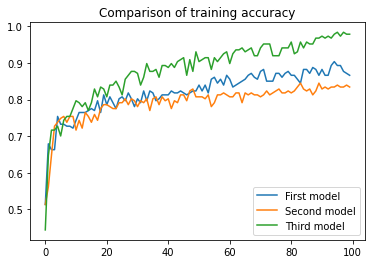

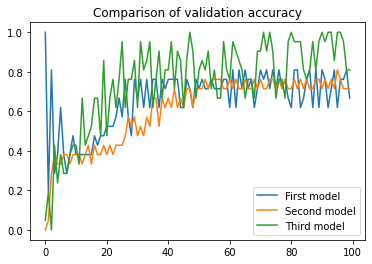

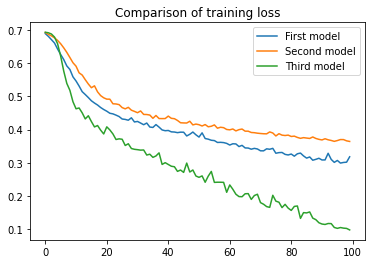

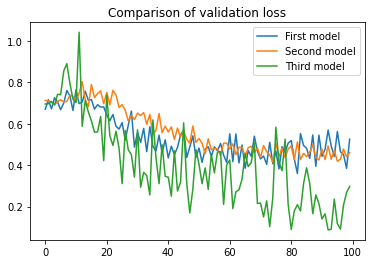

In [22]:
# Задаем архитектуру сети с уменьшенным размером входного слоя в два раза
model = Sequential()
model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Функция потерь для оценки качества работы
# binary crossentropy - для задач бинарной классификации
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Обучение сети
out3 = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

# Построение графиков сравнения
plt.plot(out1.history['accuracy'], label='First model')
plt.plot(out2.history['accuracy'], label='Second model')
plt.plot(out3.history['accuracy'], label='Third model')
plt.title('Comparison of training accuracy')
plt.legend()

plt.figure()

plt.plot(out1.history['val_accuracy'], label='First model')
plt.plot(out2.history['val_accuracy'], label='Second model')
plt.plot(out3.history['val_accuracy'], label='Third model')
plt.title('Comparison of validation accuracy')
plt.legend()
plt.show()

plt.plot(out1.history['loss'], label='First model')
plt.plot(out2.history['loss'], label='Second model')
plt.plot(out3.history['loss'], label='Third model')
plt.title('Comparison of training loss')
plt.legend()

plt.figure()

plt.plot(out1.history['val_loss'], label='First model')
plt.plot(out2.history['val_loss'], label='Second model')
plt.plot(out3.history['val_loss'], label='Third model')
plt.title('Comparison of validation loss')
plt.legend()
plt.show()

## Вывод

В ходе сравнения трех моделей можно сделать вывод, что при уменьшении количества нейронов на входном слое уменьшилась точность примерно на 0.1, а потери наоборот увеличились также примерно на 0.1

Однако, при добавлении промежуточного скрытого слоя результаты значительно улучшились, значительно возрасла как точность, так и значительно уменьшились потери.